## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Regression 
%matplotlib inline


## Kaggle API Connection 

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

## Download Data from Kaggle 

In [3]:
api.dataset_download_file('budincsevity/szeged-weather','weatherHistory.csv')

False

## Unzip The Downloaded Dataset File 

In [4]:
from zipfile import ZipFile
zf = ZipFile('weatherHistory.csv.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

## Read Required Data From CSV File

In [5]:
dataset = np.array(pd.read_csv('weatherHistory.csv', usecols=['Apparent Temperature (C)', 'Humidity']))

## Getting Sample Data  

In [6]:
X = np.array(np.reshape(dataset[:250, 1], (250, 1)))
Y = np.array(np.reshape(dataset[:250, 0], (250, 1)))


## Data Plot Before Regression  

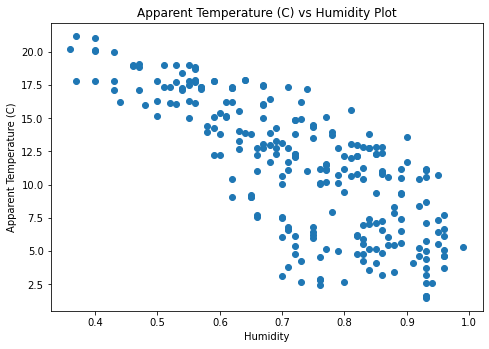

In [7]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('Humidity')
ax.set_ylabel('Apparent Temperature (C)')
ax.set_title('Apparent Temperature (C) vs Humidity Plot')
ax.scatter(X,Y)
plt.show()

## Calling The Linear Regression Method  

In [8]:
beta_hat, std_error, CL, CR = Regression.linearRegression(X, Y)
beta_hat = np.reshape(beta_hat, (beta_hat.shape[0], ))
std_error = std_error[0][0]
CL = np.reshape(CL, (CL.shape[0], ))
CR = np.reshape(CR, (CR.shape[0], ))

print(beta_hat)
print(std_error)
print(CL)
print(CR)

[ 29.75496806 -25.25935759]
0.2053513002454334
[ 29.35247951 -25.66184614]
[ 30.15745661 -24.85686904]


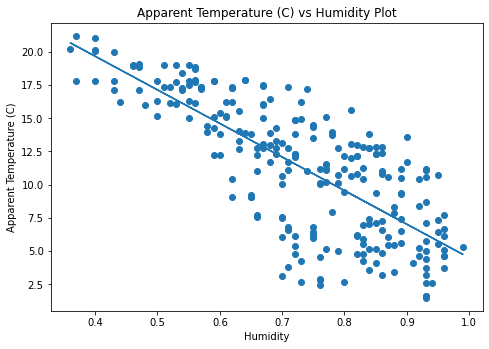

In [9]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel('Humidity')
ax.set_ylabel('Apparent Temperature (C)')
ax.set_title('Apparent Temperature (C) vs Humidity Plot')
ax.scatter(X, Y)
ax.plot(X,beta_hat[0] + X * beta_hat[1])
plt.show()

## Plot Credible Intervals

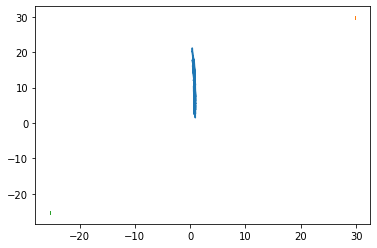

In [15]:
plt.plot(X, Y)
plt.plot([beta_hat[0] ,beta_hat[0]], [CL[0] ,CR[0]], linewidth = 1)
plt.plot([beta_hat[1] ,beta_hat[1]], [CL[1] ,CR[1]], linewidth = 1)
plt.show()